# Image stitching
In order to better visualize the particles themself, a new image is created containing a compilation of all discovered particles.

At first, a new blank image is created ([Prepare new image](#Prepare-new-image)) which can hold all particles. Then, for each discovered particle, the image file and position of the particle in the image are looked up and finally the loaded image is cropped to the given size ([Crop images](#Crop-images)). The cropped image is then pasted into the created image ([Combine particles](#Combine-particles)). Then, a grid is drawn in the image ([Grid](#Grid)) and finally the image is saved and displayed ([Export image](#Export-image)).

#### Preparation
As this script is designed to be used both externally and stand-alone, at first some required modules are loaded. Then, some global variables are checked whether they have been created externally and if not, are assigned.

In [2]:
# Import modules
from math import floor, ceil
from PIL import Image, ImageDraw
from IPython import display 

In [3]:
# directory
try:
    directory
except NameError:
    directory = "F:\\PA_UC\\"
    print("Directory not specified, set to "+directory)

# stub
try:
    stub
except NameError:
    stub = 1
    print("Stub not specified, set to "+str(stub))
    
# crop size (in pixels)
try:
    CROP_SIZE
except NameError:
    CROP_SIZE = 24
    print("Crop_size not specified, set to "+str(CROP_SIZE)+" pixels")
    
# data
try:
    data
except NameError:
    print("No data available, running ImportData:")
    %run ./ImportData.ipynb
    print("-----")

Directory not specified, set to F:\PA_UC\
Stub not specified, set to 1
Crop_size not specified, set to 24 pixels
No data available, running ImportData:
File: F:\PA_UC\pa_uc.csv
Date: 13.12.2016
Voltage: 10.0 kV
Magnification: 2500x
Measurement time: 30.0 s
Number of columns: 28
Number of particles: 3639
Particles on stub 1: 829
-----


#### Prepare new image
Prepare a new (blank image). At first, determine the number of rows and columns of the image, therefore, two options are possible. The first is to prepare a square image and extent in the horizontal direction to fit all particles. An alternative is to make an image with a fixed width (e.g. the width of the Jupyter notebook) and resize in the vertical direction to fit all particles. After setting the number of rows and columns, a new, blank, image is created with the required size.

In [4]:
# Method 1: Square
#NUM_Y = floor(len(data)**0.5)
#NUM_X = ceil(len(data)/NUM_Y)

# Method 2: Fixed width
NUM_X = int(floor(980/CROP_SIZE))*2
NUM_Y = int(ceil(len(data)/NUM_X))

imNew = Image.new('L', (CROP_SIZE*NUM_X, CROP_SIZE*NUM_Y))

#### Crop images
Prepare a function to extract a particle from an image. This allows the usage of a loop referring to this function.

In [5]:
strStub = '{num:02d}'.format(num=stub)
img_size = Image.open(directory+"stub"+strStub+"\\fld0001\\search.png").size

def ImageGet(index=0):
    # Get field
    strField = '{num:04d}'.format(num=int(data.iloc[index]["fieldnum"]))
    
    # Calculate position of particle on image
    partX = int(data.iloc[index]["X_cent"])
    partY = img_size[1]-int(data.iloc[index]["Y_cent"])
    box = (
        partX-int(0.5*CROP_SIZE), 
        partY-int(0.5*CROP_SIZE), 
        partX+int(0.5*CROP_SIZE), 
        partY+int(0.5*CROP_SIZE)
    )
    
    # Open image and crop
    im = Image.open(directory+"stub"+strStub+"\\fld"+strField+"\\search.png")
    im = im.convert('L')
    imCrop = im.crop(box)
    
    return imCrop

#### Combine particles
Loop through all particles and determine the position to paste each particle image. Then paste the particle in the created image.

In [6]:
for i in range(len(data)):
    imCrop = ImageGet(i)

    # Determine location to paste image
    yy=int(floor(i/NUM_X))
    xx=i%NUM_X
    box = (
        int(xx*CROP_SIZE), 
        int(yy*CROP_SIZE), 
        int((xx+1)*CROP_SIZE), 
        int((yy+1)*CROP_SIZE)
    )
    imNew.paste(imCrop, box)

#### Grid
Add a grid to the image to clarify that the image is a compilation and not an actual recording.

In [7]:
d = ImageDraw.Draw(imNew)
for yy in range(1,NUM_Y):
    d.line((0, yy*CROP_SIZE, NUM_X*CROP_SIZE, yy*CROP_SIZE), fill=64, width=1)
for xx in range(1,NUM_X):
    d.line((xx*CROP_SIZE, 0, xx*CROP_SIZE, NUM_Y*CROP_SIZE), fill=64, width=1)

#### Export image
Finally, the produced compilation can be saved (*stub##.png*) in the main directory and is displayed inline.

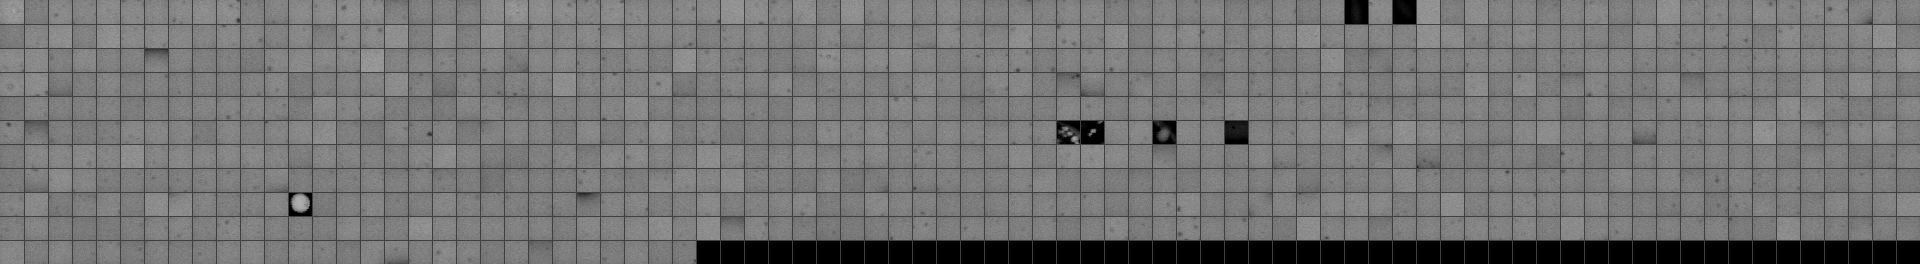

In [8]:
FileImage = directory+"Stub"+str(stub)+".png"
imNew.save(FileImage)
display.Image(filename=FileImage)